In [1]:
import os.path as osp



In [2]:
osp.pardir

'..'

In [5]:
osp.abspath(os.path.join(yourpath, os.pardir))

NameError: name 'os' is not defined

In [4]:
osp.join(osp.abspath(''), osp.pardir)

'/home/jovyan/HyperDomainNet/examples/..'

In [6]:
import os

os.chdir()
print(Path(os.path.abspath('')))

/home/jovyan/HyperDomainNet


In [1]:
%cd ..

/home/jovyan/HyperDomainNet


In [2]:
import os
import json
import subprocess
import numpy as np
import torch
import pprint
import matplotlib.pyplot as plt

from torchvision import transforms
from PIL import Image
from pathlib import Path
from restyle_encoders.psp import pSp
from restyle_encoders.download import get_download_model_command, MODEL_PATHS
from core.utils.example_utils import (
    Inferencer, run_on_batch, get_avg_image,
    get_celeb_latents, to_im, load_inversion_model, run_alignment
)
from core.utils.common import align_face
from download import load_restyle_weights
from argparse import Namespace

## Custom Image stylization

In [3]:
inversion_args = {
    "model_path": "pretrained/restyle_psp_ffhq_encode.pt",
    "transform": transforms.Compose(
        [
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ]
    )
}

### Inversion setup

In [4]:
load_restyle_weights()

[ReStyle] weights are already downloaded


In [5]:
net, opts = load_inversion_model(inversion_args)

Loading ReStyle pSp from checkpoint: pretrained/restyle_psp_ffhq_encode.pt
Model successfully loaded!


### Target image setup and inversion

In [6]:
image_path = 'examples/custom_images/elon_musk.jpeg'
transformed_image = inversion_args['transform'](run_alignment(image_path))

NameError: name 'align_face' is not defined

In [8]:
with torch.no_grad():
    avg_image = get_avg_image(net)
    result_batch, result_latents = run_on_batch(transformed_image.unsqueeze(0).cuda(), net, opts, avg_image)
    latent = result_latents[0][-1]

### Model setup and inference

In [9]:
da_model_ckpt = torch.load('checkpoints/td_checkpoints/td_pixar.pt', map_location='cpu')
device = 'cuda:0'
da_model = Inferencer(da_model_ckpt, device)

### Editing

In [10]:
src_imgs, trg_imgs = da_model([latent], input_is_latent=True)

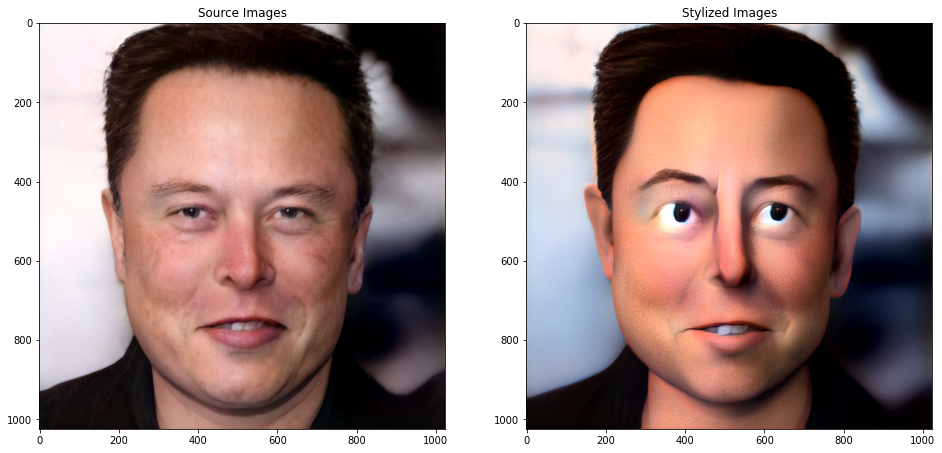

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

ax[0].imshow(to_im(src_imgs))
ax[0].set_title('Source Images')

ax[1].imshow(to_im(trg_imgs))
ax[1].set_title('Stylized Images')

plt.show()

## Celeb Images stylization

### Model setup

In [12]:
da_model_ckpt = torch.load('checkpoints/td_checkpoints/td_pixar.pt', map_location='cpu')
device = 'cuda:0'
da_model = Inferencer(da_model_ckpt, device)

Celeba Names Set 

- Chris 
- Morgan
- Obama
- Pichai
- Scarlett
- Gakki
- Green_Lantern
- Oprah
- Rock
- Su
- Yui

In [13]:
names = [
    'Green_Lantern',
    'Obama',
    'Pichai'
]
latent = get_celeb_latents(names).to(device)

In [14]:
src_imgs, trg_imgs = da_model([latent], input_is_latent=True)

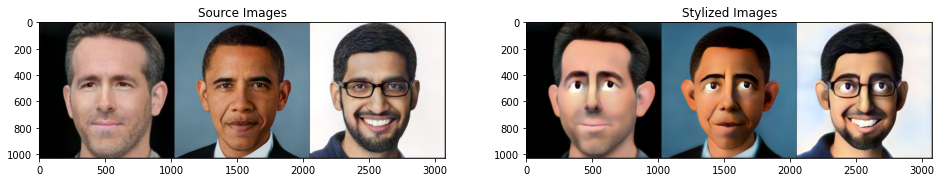

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

ax[0].imshow(to_im(src_imgs))
ax[0].set_title('Source Images')

ax[1].imshow(to_im(trg_imgs))
ax[1].set_title('Stylized Images')

plt.show()